In [1]:
%matplotlib inline

from IPython.display import Audio
from IPython.display import Image

import numpy as np 
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\dsmoljan\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,Unnamed: 0,classes,classes_id,file_name,file_path,audio_length,genre,drums
0,0,['cel'],[0],008__[cel][nod][cla]0058__1.wav,IRMAS_Training_Data/cel/008__[cel][nod][cla]00...,2.999977,cla,False
1,1,['cel'],[0],008__[cel][nod][cla]0058__2.wav,IRMAS_Training_Data/cel/008__[cel][nod][cla]00...,2.999977,cla,False
2,2,['cel'],[0],008__[cel][nod][cla]0058__3.wav,IRMAS_Training_Data/cel/008__[cel][nod][cla]00...,2.999977,cla,False
3,3,['cel'],[0],012__[cel][nod][cla]0043__1.wav,IRMAS_Training_Data/cel/012__[cel][nod][cla]00...,2.999977,cla,False
4,4,['cel'],[0],012__[cel][nod][cla]0043__2.wav,IRMAS_Training_Data/cel/012__[cel][nod][cla]00...,2.999977,cla,False


In [4]:
df_test.head()

,Unnamed: 0,classes,classes_id,file_name,file_path,audio_length
0,0,['gel'],[4],(02) dont kill the whale-1.wav,IRMAS_Validation_Data/(02) dont kill the whale...,19.8
1,1,['gel'],[4],(02) dont kill the whale-11.wav,IRMAS_Validation_Data/(02) dont kill the whale...,10.4
2,2,"['gel', 'voi']","[4, 10]",(02) dont kill the whale-12.wav,IRMAS_Validation_Data/(02) dont kill the whale...,6.4
3,3,"['gel', 'voi']","[4, 10]",(02) dont kill the whale-13.wav,IRMAS_Validation_Data/(02) dont kill the whale...,6.9
4,4,"['gel', 'voi']","[4, 10]",(02) dont kill the whale-14.wav,IRMAS_Validation_Data/(02) dont kill the whale...,13.2


In [5]:
df_train.shape

(6705, 8)

In [6]:
df_test.shape

(2874, 6)

# Analysing the train dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6705 entries, 0 to 6704
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6705 non-null   int64  
 1   classes       6705 non-null   object 
 2   classes_id    6705 non-null   object 
 3   file_name     6705 non-null   object 
 4   file_path     6705 non-null   object 
 5   audio_length  6705 non-null   float64
 6   genre         6705 non-null   object 
 7   drums         1882 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 419.2+ KB


The only interesting thing visible from the info method is that information about the presence of drums is available in only 1882 out of 6705 entires, or around 28% of the dataset. All the examples contain information about the example's class, audio length and genre.

In [8]:
df_train["audio_length"].nunique() == 1

True

We can see that all train samples have the same length of 3 seconds.

In [9]:
value_counts = df_train["classes"].value_counts()
value_counts

['voi']    778
['gel']    760
['pia']    721
['org']    682
['gac']    637
['sax']    626
['vio']    580
['tru']    577
['cla']    505
['flu']    451
['cel']    388
Name: classes, dtype: int64

In [10]:
percentages = value_counts / len(df_train) * 100
percentages

['voi']    11.603281
['gel']    11.334825
['pia']    10.753169
['org']    10.171514
['gac']     9.500373
['sax']     9.336316
['vio']     8.650261
['tru']     8.605518
['cla']     7.531693
['flu']     6.726324
['cel']     5.786726
Name: classes, dtype: float64

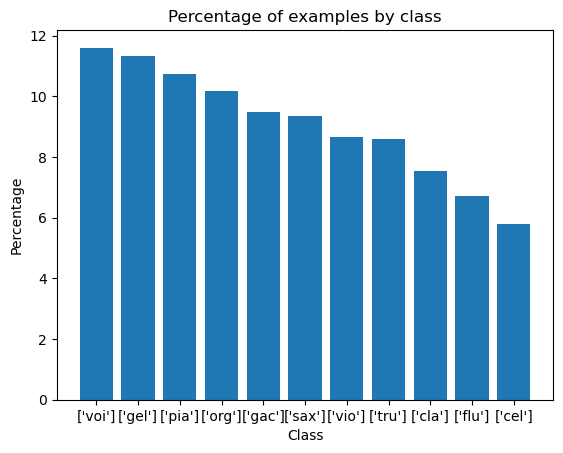

In [11]:
plt.bar(percentages.index, percentages.values)

plt.title('Percentage of examples by class')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.show()

We can see that the most represented classes are voice, electric guitar and piano, each being present in between 10.5% - 11.5% of the dataset. On the other hand, the flute and cello are present in the least amount of examples, 6.72% and 5.78%, respectively. This could prove to be a problem, as the class that occures most often appears around 2x more often that the least represented class.

In [14]:
df_train.iloc[[1]]["file_path"].item()

'IRMAS_Training_Data/cel/008__[cel][nod][cla]0058__2.wav'